# Data Loading and Previewing



In [164]:
import pandas as pd

rawData = pd.read_csv('https://raw.githubusercontent.com/skduong/anuran-calls/master/Frogs_MFCCs.csv')
rawData.head()

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,MFCCs_11,MFCCs_12,MFCCs_13,MFCCs_14,MFCCs_15,MFCCs_16,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species,RecordID
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,0.188654,-0.075622,-0.156436,0.082245,0.135752,-0.024017,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038,Leptodactylidae,Adenomera,AdenomeraAndre,1
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,0.270958,-0.095004,-0.254341,0.022786,0.163320,0.012022,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056,Leptodactylidae,Adenomera,AdenomeraAndre,1
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,0.266064,-0.072827,-0.237384,0.050791,0.207338,0.083536,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162,Leptodactylidae,Adenomera,AdenomeraAndre,1
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,0.267279,-0.162258,-0.317084,-0.011567,0.100413,-0.050224,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954,Leptodactylidae,Adenomera,AdenomeraAndre,1
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,0.332695,-0.100749,-0.298524,0.037439,0.219153,0.062837,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244,Leptodactylidae,Adenomera,AdenomeraAndre,1


In [165]:
data = rawData[rawData.columns[:23]] #focus on Family classification
data['Family'].value_counts() #get class balance

Leptodactylidae    4420
Hylidae            2165
Dendrobatidae       542
Bufonidae            68
Name: Family, dtype: int64

Rebalancing is needed: undersample Leptodactylidae, oversamle Dendrobatidae with SMOTE, remove Bufondidae

In [166]:
import numpy as np
from imblearn.over_sampling import SMOTE

lepto = data.loc[data['Family'] == 'Leptodactylidae']
hyli = data.loc[data['Family'] == 'Hylidae']
dendro = data.loc[data['Family'] == 'Dendrobatidae']

#oversample dendro classes to match dendro
subset = pd.concat([hyli, dendro])
X = subset.drop(['Family'], 1)
y = subset['Family']
oversample = SMOTE()
X, y = oversample.fit_resample(X, y) #X = data matrix, y = labels
oversample_df = pd.concat([pd.DataFrame(X), pd.DataFrame(y)], 1)
oversample_df.columns = lepto.columns.values
#pd.Series(y).value_counts()

#randomly undersample lepto by 1420 cases
undersample = lepto.drop(np.random.choice(lepto.index, 1420, False))

#rebalanced data
data = pd.concat([undersample, oversample_df])
data['Family'].value_counts()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Leptodactylidae    3000
Dendrobatidae      2165
Hylidae            2165
Name: Family, dtype: int64

Improved balanced compared to before. Not perfect, but it's a compromise between losing too many Leptodactylidae cases and having heavy imbalance with the major class.

In [167]:
lepto = data.loc[data['Family'] == 'Leptodactylidae']
dendro = data.loc[data['Family'] == 'Dendrobatidae']
hyli = data.loc[data['Family'] == 'Hylidae']

data.describe()

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,MFCCs_11,MFCCs_12,MFCCs_13,MFCCs_14,MFCCs_15,MFCCs_16,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22
count,7330.000000,7330.000000,7330.000000,7330.000000,7330.000000,7330.000000,7330.000000,7330.000000,7330.000000,7330.000000,7330.000000,7330.000000,7330.000000,7330.000000,7330.000000,7330.000000,7330.000000,7330.000000,7330.000000,7330.000000,7330.000000,7330.000000
mean,0.991239,0.320454,0.259653,0.395197,0.151952,0.122018,0.014331,-0.014710,0.084778,0.059290,-0.066983,0.007473,0.082203,0.006160,-0.036510,0.007155,0.029606,0.011295,-0.021883,-0.039127,0.020330,0.057239
std,0.062621,0.208041,0.280009,0.170142,0.172770,0.116426,0.181152,0.119556,0.186163,0.141133,0.181222,0.163992,0.208089,0.162697,0.191684,0.124633,0.151760,0.079809,0.086233,0.088718,0.079642,0.116478
min,-0.251179,-0.673025,-0.436028,-0.472676,-0.539779,-0.410417,-0.452555,-0.501465,-0.513460,-0.952266,-0.901989,-0.636147,-0.644116,-0.590380,-0.717156,-0.498675,-0.421480,-0.507603,-0.680745,-0.361649,-0.430812,-0.375461
25%,1.000000,0.185258,0.050803,0.290460,0.061544,0.036797,-0.124042,-0.100953,-0.055106,-0.002565,-0.227033,-0.097332,-0.078766,-0.099532,-0.207919,-0.086746,-0.117269,-0.034813,-0.081797,-0.096893,-0.034879,-0.022503
50%,1.000000,0.304574,0.228601,0.392221,0.163463,0.114076,-0.023345,-0.008535,0.130981,0.066329,-0.065217,0.021568,0.071223,-0.015474,-0.045328,0.014026,0.035492,0.012878,-0.012695,-0.038834,0.009520,0.038532
75%,1.000000,0.430467,0.398776,0.531140,0.243583,0.198397,0.109613,0.062611,0.235851,0.138099,0.065051,0.097353,0.276028,0.127348,0.140760,0.077912,0.167507,0.062211,0.029468,0.013011,0.071697,0.163983
max,1.000000,1.000000,1.000000,1.000000,0.752246,0.964240,0.696887,0.551762,0.738033,0.522768,0.523033,0.669470,0.945710,0.566873,0.668924,0.670700,0.451186,0.614064,0.574209,0.330555,0.389797,0.432207


In [168]:
data.corr()

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,MFCCs_11,MFCCs_12,MFCCs_13,MFCCs_14,MFCCs_15,MFCCs_16,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22
MFCCs_ 1,1.000000,-0.270223,-0.324346,-0.014260,0.202666,-0.208013,-0.049685,0.035060,-0.039954,0.040533,0.016380,-0.086471,0.028870,0.062925,-0.047550,-0.035633,0.049259,0.001076,-0.088987,-0.064515,0.051584,0.047829
MFCCs_ 2,-0.270223,1.000000,0.576198,-0.010174,-0.398078,0.031766,0.173754,0.236989,-0.001407,-0.237035,0.031270,0.205423,-0.137195,-0.090528,0.211336,-0.003718,-0.192742,0.047387,0.117735,0.086941,0.004999,-0.164174
MFCCs_ 3,-0.324346,0.576198,1.000000,0.245892,-0.731739,0.016311,0.272602,0.116733,0.004176,-0.217342,0.049998,0.440691,0.002987,-0.357437,-0.034251,0.201136,0.095001,0.043147,-0.032194,0.168618,0.059326,-0.202740
MFCCs_ 4,-0.014260,-0.010174,0.245892,1.000000,0.061155,-0.640324,-0.425414,0.192189,0.497115,0.043043,-0.412475,0.320145,0.451079,-0.462251,-0.516996,0.379436,0.550671,0.041428,-0.389263,-0.359778,0.180907,0.399138
MFCCs_ 5,0.202666,-0.398078,-0.731739,0.061155,1.000000,-0.037240,-0.674027,-0.265194,0.300930,0.382668,-0.100824,-0.334340,-0.004525,0.134309,0.020072,0.040026,-0.043677,-0.142222,0.109040,-0.098359,-0.202459,0.120829
MFCCs_ 6,-0.208013,0.031766,0.016311,-0.640324,-0.037240,1.000000,0.318879,-0.484357,-0.296056,0.094279,0.270266,-0.155417,-0.301482,0.221282,0.374980,-0.140258,-0.416800,-0.184262,0.352331,0.432182,-0.134957,-0.400158
MFCCs_ 7,-0.049685,0.173754,0.272602,-0.425414,-0.674027,0.318879,1.000000,0.128905,-0.790406,-0.266498,0.486553,-0.086467,-0.309247,0.340418,0.264711,-0.440857,-0.284954,0.164779,0.075908,0.229624,0.129766,-0.273570
MFCCs_ 8,0.035060,0.236989,0.116733,0.192189,-0.265194,-0.484357,0.128905,1.000000,0.182537,-0.714279,-0.311265,0.437657,0.232942,-0.206082,-0.137155,0.066668,0.144737,0.112098,-0.294572,-0.273156,0.290601,0.280119
MFCCs_ 9,-0.039954,-0.001407,0.004176,0.497115,0.300930,-0.296056,-0.790406,0.182537,1.000000,0.055853,-0.808251,0.312905,0.608925,-0.482097,-0.449939,0.581351,0.453406,-0.203502,-0.227945,-0.283968,0.004873,0.401136
MFCCs_10,0.040533,-0.237035,-0.217342,0.043043,0.382668,0.094279,-0.266498,-0.714279,0.055853,1.000000,0.157781,-0.695754,-0.084714,0.375169,0.018562,-0.102100,-0.005039,-0.057786,0.176603,0.072641,-0.294866,-0.076393


#Evaluating Feature Discriminating Power 

To see if any of the MFCCs have more influence on class decision, the discriminating power for each feature, F, between disjoint classes CLi and CLj (with combined size N) will be calculated using:

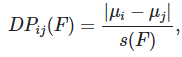   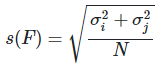



In [169]:
def DP(i, j): #take 2 classes, give discriminating power between them for all 22 features
  i = i.drop(['Family'],1); j = j.drop(['Family'],1)
  N = len(i)+len(j)
  sF = ((i.var()+j.var())/N)**0.5
  DP = abs(i.mean()-j.mean())/sF
  return DP.sort_values(0,False)

ld = DP(lepto, dendro)
dh = DP(dendro, hyli)
lh = DP(lepto, hyli)

print('Top 3 descriminating features for each pair of classes: \n', 'Lepto & Dendro:\n', ld.iloc[0:3], '\n\nDendro & Hyli:\n',dh.iloc[0:3], '\n\nLepto & Hyli:\n', lh.iloc[0:3], sep='')

Top 3 descriminating features for each pair of classes: 
Lepto & Dendro:
MFCCs_17    156.394402
MFCCs_15    118.836554
MFCCs_19    115.632171
dtype: float64

Dendro & Hyli:
MFCCs_ 3    90.629424
MFCCs_14    77.208889
MFCCs_16    71.517462
dtype: float64

Lepto & Hyli:
MFCCs_19    90.364240
MFCCs_22    85.875541
MFCCs_17    71.681561
dtype: float64


It appears that MFCCs 17 and 19 are the most influential in distinguishing Leptodactylidae frogs from the other 2. 

(array([1.000e+00, 5.000e+00, 5.800e+01, 6.440e+02, 1.287e+03, 1.420e+02,
        2.400e+01, 2.000e+00, 1.000e+00, 1.000e+00]),
 array([-0.38965599, -0.2932695 , -0.196883  , -0.1004965 , -0.00411001,
         0.09227649,  0.18866299,  0.28504948,  0.38143598,  0.47782248,
         0.57420897]),
 <a list of 10 Patch objects>)

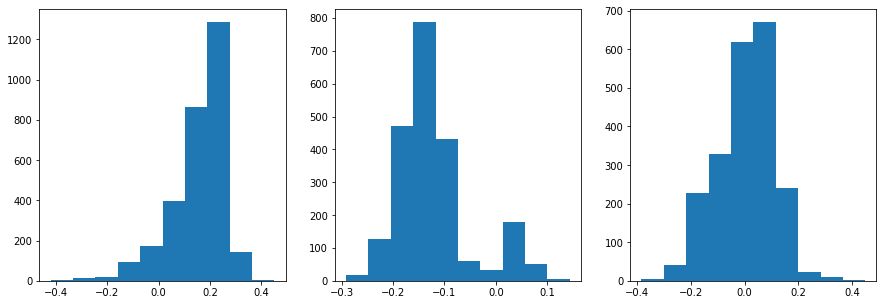

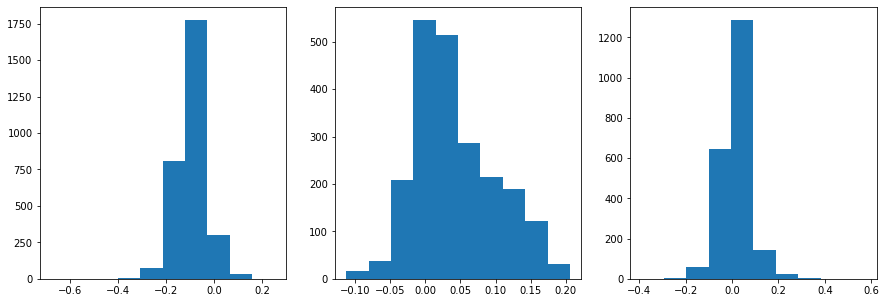

In [170]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
axes[0].hist(lepto['MFCCs_17'])
axes[1].hist(dendro['MFCCs_17'])
axes[2].hist(hyli['MFCCs_17'])

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
axes[0].hist(lepto['MFCCs_19'])
axes[1].hist(dendro['MFCCs_19'])
axes[2].hist(hyli['MFCCs_19'])

We can visually see why MFCCs 17 (top) & 19 (bottom) have such a high discriminating power. For each class, these values take on a distinct range (eg. MFCC17 is mostly positive for Leptodactylidae, negative for Dendrobatidae, and very close to zero for Hylidae). 

#KNN
(reference: https://realpython.com/knn-python/ )

Split Data into Train/Test Sets

In [171]:
from sklearn.model_selection import train_test_split

X = np.array(data.drop(['Family'], 1))
#encode family names to integer type
encode = {'Leptodactylidae':0, 'Dendrobatidae':1, 'Hylidae':2}
y = np.array(list(map(encode.get, data['Family'])), dtype=float)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print("training set = %d cases\ntest set = %d cases\n" %(len(X_train), len(X_test)))

training set = 5864 cases
test set = 1466 cases



Training KNN model

In [172]:
from sklearn.neighbors import KNeighborsRegressor

knn_model = KNeighborsRegressor(n_neighbors=3)
knn_model.fit(X_train, y_train)

#evaluating performance of different sized K neighbors; start with a broad range to get a general idea
K_test = [1,5,10,20,30,40,50,100]

#for k in K_test

In [173]:
knn_model.predict(X_test)

array([0., 0., 1., ..., 0., 2., 2.])

In [131]:

encode = {'Leptodactylidae':0, 'Dendrobatidae':1, 'Hylidae':2}
np.array(list(map(encode.get, data['Family'])), dtype= float)

array([0., 0., 0., ..., 2., 2., 2.])

True